<h1 style="color:red;">Explanatory models in neonatology (Explain) - Tutorial</h1>

<h4>Introduction</h4>

<p>Critically ill patients are fragile, and their physiology is complex and frequently only partially understood. Diagnostic reasoning, clinical decision making, and communication between members of the healthcare team often take place under time pressure.</p> 

<p>Mathematical models of human physiology can support the understanding of a range of conditions, but remain inaccessible to most clinicians due to a lack of mathematical and/or code reading skills. The use of these models in reasoning and decision making is even more challenging than their use in understanding conditions. To overcome these obstacles we propose to use the concept and method of explanatory models, first described in the medical educational context (1). Our initial focus will be on deeper understanding of, and reasoning about, cardiorespiratory (patho)physiology by academic researchers in a neonatal intensive care setting. The explanatory model for this purpose will be referred to as "Explain".  Our ultimate objective remains support of clinical decision making.</p>

<p>This tutorial shows you how to work with the Explain model framework and how to build new patients but also how use the existing models and even how to develop your own models with this framework.</p>

<h4>Requirements</h4>

<p>The preferred way to use Explain is by using the webbased version at <a href="https://explain-modeling.com">explain-modeling.com</a>. You can apply for a free account by e-mailing to: <a href="mailto:tim.antonius@radboudumc.nl">tim.antonius@radboudumc.nl</a>. </p>

<p>To use Explain on a local computer additional steps are necessary. For performance reasons we advise to use PyPy version 3.10 <a href="https://www.pypy.org/">(pypy.org) </a>which is a fast, compliant alternative implementation of the Python language but Explain can be run with the normal CPython interpreter from version 3.9 and higher <a href="https://www.python.org/downloads/">(www.python.org)</a>. Explain uses the jupyter, ipykernel, ipympl, matplotlib and multitimer packages. So use your package manager to install these packages. PyPy is highly recommended as the computations of the Explain model greatly benefit from PyPy's JIT compiler. VS Code <a href="https://code.visualstudio.com/download">(code.visualstudio.com)</a> is a good and free editor capable of running interactive python notebooks. As the Explain model also uses some C++ modules the setup is not straightforward. <br><br>Detailed instructions on how to setup your workplace for using the local version of Explain in Windows/Linux/OsX are found <a href="documentation/local_setup.txt">here</a>.

<h4>Let's go</h4>
<p>Explain uses interactive python notebooks (Jupyter) containing the python implementation of the Explain model. The purpose of the notebook is to provide a framework for developers to use Explain for research purposes where clinical problems can be modeled and analyzed. It can be used to test a hypothesis, to explain complex physiology or facilitate clinical discussions. It is also possible to add models, to extend the existing models and to build your own set of patients.</p>

<p>The code is partially optimized for speed, is modular in design but is especially made for readability and explanation. The notebook contains the conceptual and mathematical models and provides links to the python code. By following this notebook step-by-step you'll get a better understanding on how the Explain model actually works and how to build your own patients and even add your own models.</p>

<h2 style="color:red;">The ModelEngine object</h2>

<p>The ModelEngine object is the conductor of the orchestra. It takes care of all setup, running and dataprocessing of the model. After importing the ModelEngine module we have to provide it with a JSON file containing all model parameters. The ModelEngine returns an initialized instance of the ModelEngine. We store this instance in the variable 'model' but this can have any name.</p>

<p>Now run the Python code by clicking on the code-block below and press SHIFT-ENTER</p>

In [1]:
# import the model engine
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model parameters file
model = ModelEngine("normal_neonate.json")

 Model 'normal neonate' loaded and initialized correctly.


<p>If all goes well and the JSON file containing the model parameters is processed correctly, the ModelEngine will let you know that the model loaded and initialized correctly. The model is now ready for use! </p>

<p>All information about the model is now contained in the variable 'model' which is a Python object. This 'model' object has a range of properties and methods but is not designed to interact with directly as it has a lot of 'housekeeping' methods and abstractions. So although the ModelEngine object is the most important object of Explain you will rarely interact with it.</p> 

<h2 style="color:red;">The BaseInterface object</h2>
<p>To make interacting with the 'model' object more conventient and safe, a model interface object can be attached to the 'model' object. There is a general model interface object <a href="explain_core/interfaces/BaseInterface.py">(BaseInterface)</a> which can be used but it is also possible to build your own custom model interface object (for example <a href="custom_interfaces/NeoInterface.py"> NeoInterface </a>) based on the general model interface.</p>

<p>The next code block imports the BaseInterface module and instantiates a model interface object called 'io' and takes the ModelEngine object as it's single argument. The object 'io' can have any name you find convenient.</p> 
<p>Please click on the code block and run it by pressing SHIFT-ENTER. Make sure you did run the code block above where the ModelEngine object is build</p>

In [2]:
# import the general mode interface and instantiate it with the current model object
from explain_core.interfaces.BaseInterface import BaseInterface

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
io = BaseInterface(model)

<p>The 'io' object is now your model interface which provides an easier way to interact with the model. It has a number of methods which we will discuss now.</p>


<h3 style="color:dodgerblue;"><span style="font-family: 'Courier New';">calculate</span> and <span style="font-family: 'Courier New'">fast_forward</span> methods of the BaseInterface object</h3>
<p>The first and easiest is the <span style="font-family: 'Courier New'">calculate</span> method. This method takes 1 argument called <span style="font-family: 'Courier New'">time_to_calculate</span> which states the number of seconds that will be calculated. A different implementation of the <span style="font-family: 'Courier New'">calculate</span> method is the <span style="font-family: 'Courier New'">fast_foward</span> method which is somewhat faster but does not gather any data. The <span style="font-family: 'Courier New'">fast_forward</span> method also take 1 argument called time_to_calculte.</p>

<p>Execute the next code block with SHIFT-ENTER.</p>

In [3]:
io.calculate(time_to_calculate=10)

 Ready in 1.3 sec. Average model step in 0.0664 ms.


<p> Congratulations. The modeled patient is now 10 seconds older!</p>

<h3 style="color:dodgerblue;"><span style="font-family: 'Courier New'">analyze</span> method of the BaseInterface object</h3>
<p>Another important method of the BaseInterface is the <span style="font-family: 'Courier New'">analyze</span> method. This method analyzes the requested model variables and returns the result. Before we discuss all the possibilities of this important method let's first do a simple analysis. </p>

<p>Again execute the code block with SHIFT-ENTER (from now on we leave out this instruction and assume you get the idea). </p>

In [4]:
result = io.analyze(
    ["AA.pres", "LV_AA.flow"],
    time_to_calculate=10,
    weight_based=True,
    sampleinterval=0.0005,
    suppress_output=False,
)

AA.pres         : max   72.99853, min   44.65168 mmHg
LV_AA.flow      : net  231.10821, forward  231.10821, backward        0.0 ml/kg/min, stroke volume:     1.8341 ml/kg, 


<p>This is a slightly more involved method which takes a number of required and optional arguments. Let's break this method down. </p>

<p>The first and required argument is a list of model variables which the model will analyze. This pattern returns a lot in Explain and is a important design concept.</p> 
<p>A list is enclosed in brackets [ ] and a model variable is enclosed by " ". Between the " " the model name is stated first and the variable of that model second separated by a dot (dot-notation style). So if you want to analyze the pressure (pres) in the ascending aorta model called AA the list argument becomes <span style="font-family: 'Courier New'">["AA.pres"]</span>. Multiple variables are separated by comma's, p.e. <span style="font-family: 'Courier New'">["AA.pres", "AA.vol", "PA.pres"]</span>. The analyze routine outputs the result but you can also store it in another object (in the example the object is called result). </p>

<p>There are several optional arguments. When an argument is not set the default value is used: 
<li> <span style="font-family: 'Courier New'">time_to_calculate</span> = no of seconds. The default is 10 seconds.</li>
<li> <span style="font-family: 'Courier New'">weight_based</span> = True/False. When True the result are shown relative to the weight when appropriate. The default is False. </li>
<li> <span style="font-family: 'Courier New'">sampleinterval</span> = no of seconds. When a higher resolution analysis is required choose 0.0005 seconds.  The default is 0.005 seconds. </li>
<li> <span style="font-family: 'Courier New'">suppress_output</span> = True/False. Set True when you want to store the result but don't want the printed output. The default is False.  </li>


Another example of the <span style="font-family: 'Courier New'">analyze</span> method of the general model interface. Notice that when you type io. and press the TAB key all methods of the io object will appear.

In [5]:
result = io.analyze(
    ["LV.vol", "AA_COR.flow", "PA.pres"],
    time_to_calculate=30,
    weight_based=False,
    sampleinterval=0.0005,
    suppress_output=False,
)

LV.vol          : max    8.88771, min    2.57154 ml
AA_COR.flow     : net    9.02657, forward    9.02657, backward        0.0 ml/min, stroke volume:    0.06736 ml, 
PA.pres         : max   35.84977, min   15.29123 mmHg


<h3 style="color:dodgerblue;"><span style="font-family: 'Courier New'">plot_time_graph</span> method of the BaseInterface object</h3>
<p>The next method of the general model interface is the <span style="font-family: 'Courier New'"> plot_time_graph </span>method. This method plots a graph where the change of a model variable or variables in time is plotted.</p>

<p>First let's do a quick demonstration before we dive into the nuts and bolts of this powerful plotter method.</p>

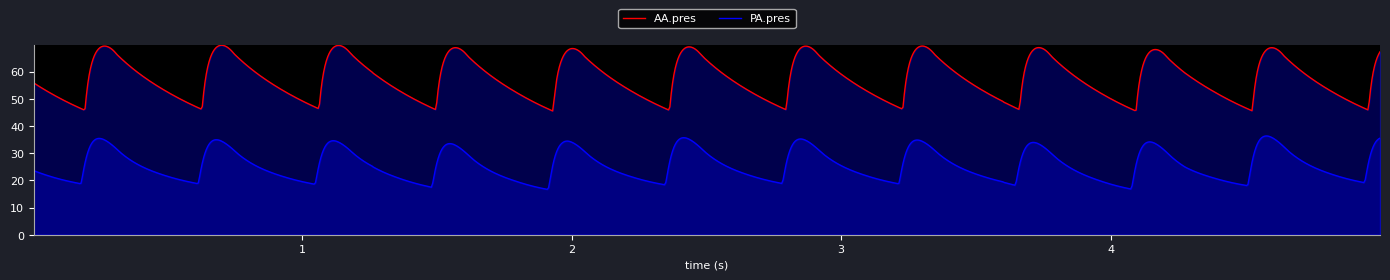

AA.pres         : max   69.64858, min   45.49172 mmHg
PA.pres         : max   36.30539, min    16.6719 mmHg


In [6]:
io.plot_time_graph(["AA.pres", "PA.pres"], time_to_calculate=5.0, analyze=True)

<p>This plotter function has some really nice features which we have to dive into to realize it's full potential. </p>

<p>Just like the 'analyze' method the plot_time_graph method takes 1 required argument which is a list of model variables. See the explanation of the analyze method for a detailed description on how to format such a list. You can have a maximum of 6 model variables in the same plot.</p>

<p> There are several optional arguments. When an argument is not set the default value is used:
<li> <span style="font-family: 'Courier New'">time_to_calculate</span> = no of seconds. The default is 10 seconds.</li>
<li><span style="font-family: 'Courier New'">combined</span> = True/False. This determines whether the plotter plots all model variables of the list in 1 plot or not. The default is True.</li>
<li><span style="font-family: 'Courier New'">sharey</span> = True/False. This determines whether or not all the subplots have the same y-axis scale.The defualt is True. </li></p>
<p>See an example of multiple plots below.</p>

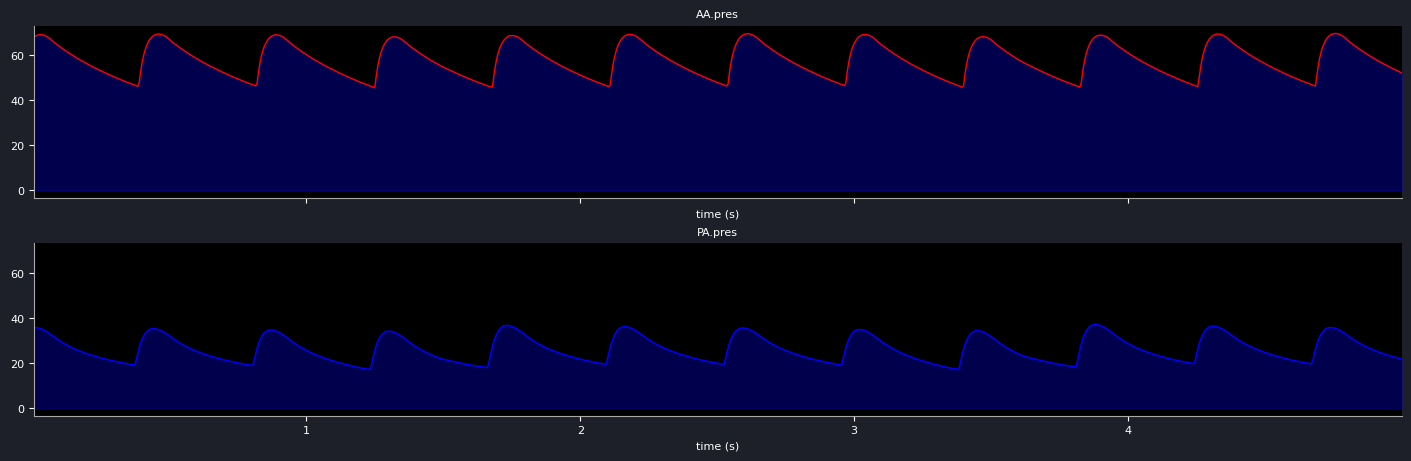

AA.pres         : max   69.70014, min   45.61806 mmHg
PA.pres         : max   37.07262, min   17.07449 mmHg


In [7]:
io.plot_time_graph(
    ["AA.pres", "PA.pres"],
    time_to_calculate=5.0,
    combined=False,
    sharey=True,
    analyze=True,
)

<p>
Other optional arguments of the plotter functions are:

<li><span style="font-family: 'Courier New'">analyze</span> = True/False. When set to True the plotter outputs an analysis of the model variables at the bottom of the graph.
<li><span style="font-family: 'Courier New'">sampleinterval</span> = 0.005. When a higher resolution plot is desired set this value to 0.0005.
<li><span style="font-family: 'Courier New'">fill</span> = True/False. Determines whether the space below the graph is filled. Default is True.
<li><span style="font-family: 'Courier New'">fill_between</span> = True/False. Determines whether the space between the first two model variables is filled. Default is False.
<li><span style="font-family: 'Courier New'">zeroline</span> = True/False. If set to True a dotted line at y=0 will be shown. Default is False
<li><span style="font-family: 'Courier New'">ylabel</span> = textlabel. You can set the argument to a textlabel which will be shown on the y-axis. Default = "".
<li><span style="font-family: 'Courier New'">autoscale</span> = True/False. If set to true the y-axis will autoscale. If False the plot uses the ylowerlim and yupperlim as limits for the y-axis. Default is True.
<li><span style="font-family: 'Courier New'">ylowerlim</span> = number. If autoscale is False then this argument sets the lower limit of the y-axis. Default = 0
<li><span style="font-family: 'Courier New'">yupperlim</span> = number. If autoscale is False then this argument sets the upper limit of the y-axis. Default = 100
</p>

<p>The <span style="font-family: 'Courier New'">plot_time_graph</span> method is a powerful method. Remember, you only have to pass the required argument which is the list of model variables you want to display. Only set the other optional arguments if you don't want to use the default values. Below is an example where ALL arguments are set.


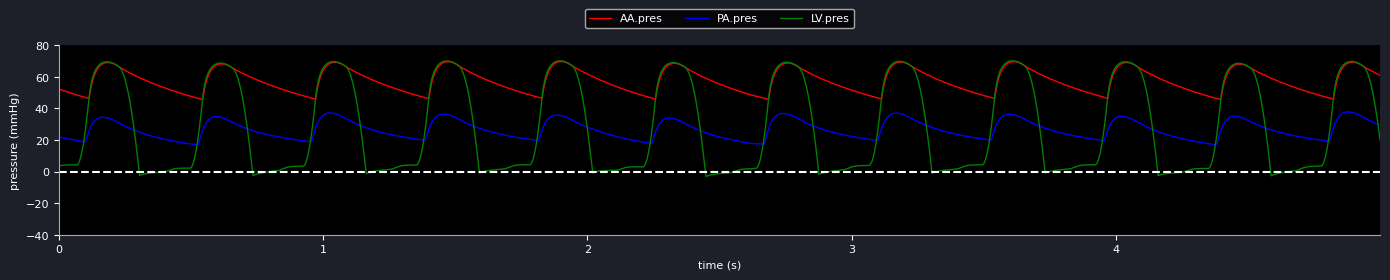

AA.pres         : max   69.68407, min   45.56204 mmHg
PA.pres         : max   37.81352, min   16.87627 mmHg
LV.pres         : max   70.16929, min   -3.06442 mmHg


In [8]:
io.plot_time_graph(
    ["AA.pres", "PA.pres", "LV.pres"],
    time_to_calculate=5.0,
    combined=True,
    sharey=True,
    analyze=False,
    fill=False,
    ylabel="pressure (mmHg)",
    autoscale=False,
    ylowerlim=-40,
    yupperlim=80,
    zeroline=True,
    sampleinterval=0.0005,
    analyze=True,
)

<h3 style="color:dodgerblue;"><span style="font-family: 'Courier New'">plot_xy_graph</span> method of the BaseInterface object</h3>
<p>The other plotter method is the <span style="font-family: 'Courier New'"> plot_xy_graph </span>method. This method plots two model variables against each other. This can be used for pressure-volume loops for example. </p>

<p>
Arguments of this plotter function are:

<li><span style="font-family: 'Courier New'">property_x</span> = model variable. This required argument sets the model variable which is plotted on the x-axis. The format follows the dot-notation scheme as described above. For example <span style="font-family: 'Courier New'">"LV.vol"</span>
<li><span style="font-family: 'Courier New'">property_y</span> = model variable. This required argument sets the model variable which is plotted on the y-axis. The format follows the dot-notation scheme as described above. For example <span style="font-family: 'Courier New'">"LV.pres"</span>
<li> <span style="font-family: 'Courier New'">time_to_calculate</span> = no of seconds. The default is 10 seconds.</li>
<li><span style="font-family: 'Courier New'">sampleinterval</span> = 0.005. When a higher resolution plot is desired set this value to 0.0005.
</p>

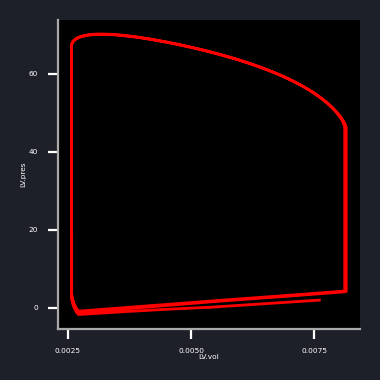

In [9]:
io.plot_xy_graph("LV.vol", "LV.pres", time_to_calculate=1.0, sampleinterval=0.0005)

<h3 style="color:dodgerblue;"><span style="font-family: 'Courier New'">plot_rt</span> method of the BaseInterface object (EXPERIMENTAL)</h3>

<p>The general model interface also has some experimental features where you can plot model variables against time or against each other in real time. Python in a interactive notebook does not have the performance to display nice, fluent running realtime plots but this experimental feature might be handy in some sitations.<p>

<p>First, we need to switch the the matplotlib renderer to use a different backend (don't worry if you don't know what this means) </p>

<p> The <span style="font-family: 'Courier New'">plot_rt</span> method works very similar to the other plotter but does have some small differences. The only required argument is a list like we've seen before in other methods, p.e. <span style="font-family: 'Courier New'">["AA.pres", "AA.vol"]</span>.

<p>Other optional arguments of this realtime plotter function are:

<li><span style="font-family: 'Courier New'">update_interval</span> = in seconds. Determines at what interval the plot updates. Default = 0.2 seconds.
<li><span style="font-family: 'Courier New'">autoscale</span> = True/False. Determines whether or not the plot will autoscale. Default = True
<li><span style="font-family: 'Courier New'">y_min</span> = number. If not autoscaled this determines the y-axis lower limit. Default = 0
<li><span style="font-family: 'Courier New'">y_max</span> = number. If not autoscaled this determines the y-axis upper limit. Default = 100
<li><span style="font-family: 'Courier New'">xy</span> = True/False. If true, the first two model variables are plot against each other instead of against time. Default = False
<li><span style="font-family: 'Courier New'">autoscale_interval</span> = in seconds. At what interval does the plot autoscale. Default = 2.0
<li><span style="font-family: 'Courier New'">combined</span> = True/False. Combine the model variables in 1 plot or not. Default = True
<li><span style="font-family: 'Courier New'">time_window</span> = in seconds. How much seconds are shown in the plot. Default = 5.0
<li><span style="font-family: 'Courier New'">sample_interval</span> = in seconds. If high resolution plots are needed set this to 0.0005. Default = 0.005

</p>

<h3 style="color:dodgerblue;"><span style="font-family: 'Courier New'">stop_rt</span> method of the BaseInterface object (EXPERIMENTAL)</h3>

<p> This method of the general model interface stops the realtime model </p>

<h3 style="color:dodgerblue;"><span style="font-family: 'Courier New'">restart_rt</span> method of the BaseInterface object (EXPERIMENTAL)</h3>

<p> This method of the general model interface restarts the realtime model </p>

<p>At this stage of development we advise NOT the use this realtime feature as it is still very much in development and experimental!</p>



In [10]:
# switch the backend of matplotlib to interactive mode
# %matplotlib ipympl

# plot the AA.pres and the PA.pres in separate plot against time in realtime mode
# io.plot_rt(["AA.pres","PA.pres"], update_interval=0.1, autoscale=True, xy=False, combined=True, time_window=5.0, sample_interval=0.0005)

# stop the realtime model
# io.stop_rt()

# restart the realtime model
# io.restart_rt()

<h3 style="color:dodgerblue;"><span style="font-family: 'Courier New'">get_model_property</span> method of the BaseInterface object</h3>

<p>The <span style="font-family: 'Courier New'">get_model_property</span> of the general model interface method returns the value of a model property. It takes 1 argument using the dot-notation as we have seen before. So first de model name, then a . followed by the model property. So the get the baseline elastance of the ascending aorta of the neonatal model the argument would be <span style="font-family: 'Courier New'">"AA.el_base"</span>.</p>

In [11]:
io.get_model_property("AA.el_base")

23000

<h3 style="color:dodgerblue;"><span style="font-family: 'Courier New'">set_model_property</span> method of the BaseInterface object</h3>

<p>The <span style="font-family: 'Courier New'">set_model_property</span> of the general model interface method sets the value of a model property. As it is often not a good idea to change to value of a model property instantaneously this method has some extra arguments for setting the model property gradually.</p>

<p>Arguments of the set_model_property method.
<li><span style="font-family: 'Courier New'">prop</span> = "". Target model property formatted using the dot-notation -> "MODEL.PROP".  
<li><span style="font-family: 'Courier New'">new_value</span> = value. New value of the model property.

<p>Optional arguments of the set_model_property method.
<li><span style="font-family: 'Courier New'">in_time</span> = no of seconds. In how much time is the model property changed. Default = 5.0
<li><span style="font-family: 'Courier New'">at_time</span> = no of seconds. At what time in the next model run should the propery start to change. Default = 0.0 -> meaning immediately 
</p>
<p> It is important to realize that the changes of the property are applied during the next model run!</p>



In [12]:
io.set_model_property(prop="AA.el_base", new_value=23100, in_time=10.0, at_time=0.0)
io.calculate(20)

 Ready in 1.7 sec. Average model step in 0.0427 ms.


<h3 style="color:dodgerblue;"><span style="font-family: 'Courier New'">change_model_property</span> method of the BaseInterface object</h3>

<p>The <span style="font-family: 'Courier New'">change_model_property</span> of the general model interface method changes the value of a model property by a certain factor (so relative change). As it is often not a good idea to change to value of a model property instantaneously this method has some extra arguments for changing the model property gradually.</p>

<p>Arguments of the set_model_property method.
<li><span style="font-family: 'Courier New'">prop</span> = "". Target model property formatted using the dot-notation -> "MODEL.PROP".  
<li><span style="font-family: 'Courier New'">prop_change</span> = value. Relative change of the mode property. So 0.4 means the property changes bij factor 0.4 (-60%).

<p>Optional arguments of the set_model_property method.
<li><span style="font-family: 'Courier New'">in_time</span> = no of seconds. In how much time is the model property changed. Default = 5.0
<li><span style="font-family: 'Courier New'">at_time</span> = no of seconds. At what time in the next model run should the propery start to change. Default = 0.0 -> meaning immediately 
</p>
<p> It is important to realize that the changes of the property are applied during the next model run!</p>



In [13]:
io.change_model_property(prop="AA.el_base", prop_change=0.9, in_time=10.0, at_time=0.0)
io.calculate(20)

 Ready in 1.7 sec. Average model step in 0.0415 ms.


<h3 style="color:dodgerblue;"><span style="font-family: 'Courier New'">inspect_model</span> method of the BaseInterface object</h3>

<p>The <span style="font-family: 'Courier New'">inspect_model</span> of the general model interface method returns all the properties of a model. It takes 1 argument stating the model which you want to inspect enclosed by "".</p>

In [19]:
io.inspect_model("AA")

{'_is_initialized': True,
 '_t': 0.0005,
 'ans_activity_factor': 1.0,
 'description': 'ascending aorta',
 'diastole': 0.0,
 'el_base': 20790.0,
 'el_base_ans_factor': 1.0,
 'el_base_drug_factor': 1.0,
 'el_base_factor': 1.0,
 'el_k': 0,
 'el_k_factor': 1.0,
 'fixed_composition': False,
 'is_enabled': True,
 'mean': 0.0,
 'model_type': 'BloodCapacitance',
 'name': 'AA',
 'pres': 48.22699087183905,
 'pres_atm': 0.0,
 'pres_cc': 0.0,
 'pres_ext': -3.579290473870877,
 'pres_in': 51.80804690135418,
 'pres_mus': 0.0,
 'pres_out': -3.5810560295151297,
 'pres_tm': 55.38910293086931,
 'stroke_volume': 0.0,
 'systole': 0.0,
 'u_vol': 0.003,
 'u_vol_ans_factor': 1.0,
 'u_vol_factor': 1.0,
 'vol': 0.0054907603877984166,
 'vol_max': 0.0,
 'vol_min': 0.0,
 'vol_total': 0.008491969547924683}

<h3 style="color:dodgerblue;"><span style="font-family: 'Courier New'">save_model_state</span> method of the BaseInterface object</h3>

<p>The <span style="font-family: 'Courier New'">save_model_state</span> of the general model interface method saves the current state of the ModelEngine object as a binary file with the .xpl extension. It takes 1 argument stating the filename.</p>

In [4]:
io.save_model_state("model_state")

<h3 style="color:dodgerblue;"><span style="font-family: 'Courier New'">load_model_state</span> method of the BaseInterface object</h3>

<p>The <span style="font-family: 'Courier New'">load_model_state</span> of the general model interface method loads a binary file with .xpl extension holding a saved ModelEngine state. It takes 1 argument stating the filename.</p>

In [3]:
model.load_model_state("model_state")


<h2 style="color:red;">Building and using a custom interface object</h2>

<p> The BaseInterface object exposes some high-level methods which are general and not tuned to a specific implementation of the Explain model. That's why it is almost always benefical to create a custom interface object for 'your' model. Let's first start with an example. In the custom_interfaces folder you can find a file called NeoInterface.py. This is an example of a custom model interface. You can open it by clicking on this <a href="custom_interfaces/NeoInterface.py">link</a> or navigating to the folder.</p>
<p> To use a custom interface model we have to import and instantiate it. The next code-block imports the NeoInterface model interface, instantiates it and assigns it to a Python object called 'neo'. Like before, this can have any name.</p>


In [14]:
# import the custom interface
from custom_interfaces.NeoInterface import NeoInterface

# instantiate the custom interface and pass the current model object as am argument
neo = NeoInterface(model)

<p>The neo object now contains the NeoInterface object and we can use it's functions. A custom interface object inherits all functions from the BaseInterface object so you can use the functions of the BaseInterface inside you custom model interface. Below is an example of a function of the NeoInterface object.</p>

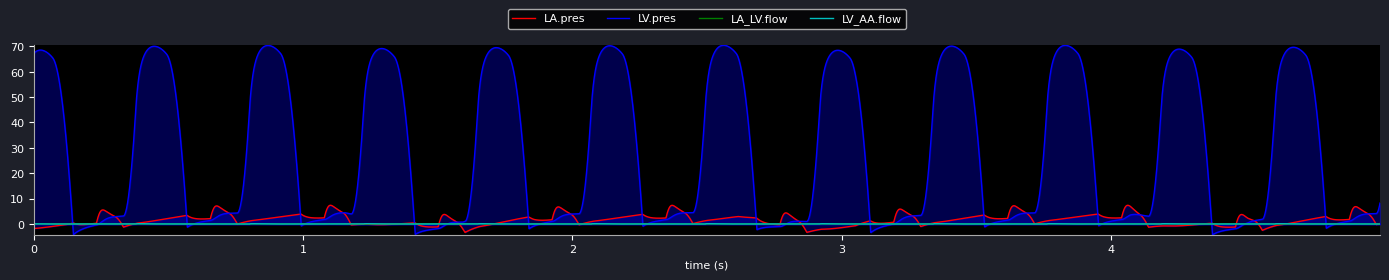

In [15]:
neo.plot_heart_left(time_to_calculate=5)

<p>When we look inside the code of the <a href="custom_interfaces/NeoInterface.py">NeoInterface</a> we can see that the function <span style="font-family: 'Courier New'">plot_heart_left</span> actually uses the <span style="font-family: 'Courier New'">plot_time_graph</span> of the BaseInterface but with preconfigured arguments especially tuned for the normal_neonate model. Examining the NeoInterface custom interface is a great way to start developing your own custom interfaces.</p>


In [16]:
# example code of the plot_heart_pressures_left function in the NeoInterface custom interface module
def plot_heart_pressures_left(
    self,
    time_to_calculate=2,
    combined=True,
    sharey=True,
    autoscale=True,
    ylowerlim=0,
    yupperlim=100,
    fill=True,
    analyze=False,
):
    self.plot_time_graph(
        ["LV.pres", "LA.pres", "AA.pres"],
        time_to_calculate=time_to_calculate,
        autoscale=True,
        combined=combined,
        sharey=sharey,
        sampleinterval=0.0005,
        ylowerlim=ylowerlim,
        yupperlim=yupperlim,
        fill=fill,
        fill_between=False,
        analyze=analyze,
    )

<p>If you want to start a new custom interface, duplicate the <a href="custom_interfaces/CustomInterfaceTemplate.py">CustomInterfaceTemplate.py</a> file in the custom_interfaces folder. Replace the CustomInterfaceTemplate filename with your own and use the same name in the class definition.</p> 

<p><span style="font-family: 'Courier New'">class YourInterfaceNameHere(BaseInterface): <br> pass<span></p>

<p>Remove the pass keyword and start programming your own custom interface methods. As the custom interface inherits from the BaseInterface you have access to the functions of the BaseInterface with the <span style="font-family: 'Courier New'">self</span> keyword. So to access the <span style="font-family: 'Courier New'">plot_time_graph</span> of the BaseInterface preceed the call to the function with the self keyword. Examine the <a href="custom_interfaces/NeoInterface.py">NeoInterface.py</a> file to see how this is done.</p>

<p>To use your custom interface import it, instantiate it and assign it to a Python object. Look above where we import the NeoInterface on how to do this. You now have your own custom model interface! </p>

In [18]:
io.inspect_model("AA")

{'_is_initialized': True,
 '_t': 0.0005,
 'ans_activity_factor': 1.0,
 'description': 'ascending aorta',
 'diastole': 0.0,
 'el_base': 20790.0,
 'el_base_ans_factor': 1.0,
 'el_base_drug_factor': 1.0,
 'el_base_factor': 1.0,
 'el_k': 0,
 'el_k_factor': 1.0,
 'fixed_composition': False,
 'is_enabled': True,
 'mean': 0.0,
 'model_type': 'BloodCapacitance',
 'name': 'AA',
 'pres': 48.22699087183905,
 'pres_atm': 0.0,
 'pres_cc': 0.0,
 'pres_ext': -3.579290473870877,
 'pres_in': 51.80804690135418,
 'pres_mus': 0.0,
 'pres_out': -3.5810560295151297,
 'pres_tm': 55.38910293086931,
 'stroke_volume': 0.0,
 'systole': 0.0,
 'u_vol': 0.003,
 'u_vol_ans_factor': 1.0,
 'u_vol_factor': 1.0,
 'vol': 0.0054907603877984166,
 'vol_max': 0.0,
 'vol_min': 0.0,
 'vol_total': 0.008491969547924683}